In [1]:
! pip install lazypredict


***DATA COLLECTION & PREPROCESSING***


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
X = df.drop('HeartDisease' , axis='columns')
y = df['HeartDisease']

In [8]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.20,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.40,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.20,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.00,Flat


In [9]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64


***DATA SPLITTING AND MODEL TRAINING***


In [10]:
X['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [11]:
X = X.apply(LabelEncoder().fit_transform)

In [12]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,12,1,1,41,147,0,1,98,0,10,2
1,21,0,2,55,40,0,1,82,0,20,1
2,9,1,1,31,141,0,2,25,0,10,2
3,20,0,0,39,72,0,1,34,1,25,1
4,26,1,2,49,53,0,1,48,0,10,2
...,...,...,...,...,...,...,...,...,...,...,...
913,17,1,3,14,122,0,1,58,0,22,1
914,40,1,0,45,51,1,1,67,0,42,1
915,29,1,0,31,9,0,1,41,1,22,1
916,29,0,1,31,94,0,0,100,0,10,1


In [13]:
standardScalerModel = StandardScaler()
X = standardScalerModel.fit_transform(X)

In [14]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=42 , shuffle=True)

In [15]:
clf = LazyClassifier(verbose=1)
models , predictions = clf.fit(X_train , X_test , y_train , y_test)

 14%|█▍        | 4/29 [00:00<00:01, 12.59it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.8532608695652174, 'Balanced Accuracy': 0.8574462920257313, 'ROC AUC': 0.8574462920257312, 'F1 Score': 0.8540908469900917, 'Time taken': 0.13637518882751465}
{'Model': 'BaggingClassifier', 'Accuracy': 0.8641304347826086, 'Balanced Accuracy': 0.8704333050127442, 'ROC AUC': 0.8704333050127443, 'F1 Score': 0.8649782251731277, 'Time taken': 0.05241537094116211}
{'Model': 'BernoulliNB', 'Accuracy': 0.8097826086956522, 'Balanced Accuracy': 0.8164218958611482, 'ROC AUC': 0.8164218958611482, 'F1 Score': 0.8110349709406625, 'Time taken': 0.01979994773864746}
{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.8315217391304348, 'Balanced Accuracy': 0.8369340939434398, 'ROC AUC': 0.8369340939434396, 'F1 Score': 0.8325729992146783, 'Time taken': 0.12454414367675781}
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.7934782608695652, 'Balanced Accuracy': 0.7987619856778736, 'ROC AUC': 0.7987619856778736, 'F1 Score': 0.7948085929598723, 'Time taken': 0.0171

 31%|███       | 9/29 [00:00<00:01, 16.41it/s]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.8913043478260869, 'Balanced Accuracy': 0.8919771816968078, 'ROC AUC': 0.8919771816968078, 'F1 Score': 0.8916450454700316, 'Time taken': 0.19851183891296387}
{'Model': 'GaussianNB', 'Accuracy': 0.8097826086956522, 'Balanced Accuracy': 0.8164218958611482, 'ROC AUC': 0.8164218958611482, 'F1 Score': 0.8110349709406625, 'Time taken': 0.018964529037475586}
{'Model': 'KNeighborsClassifier', 'Accuracy': 0.8641304347826086, 'Balanced Accuracy': 0.8667920864182546, 'ROC AUC': 0.8667920864182546, 'F1 Score': 0.8647868094938039, 'Time taken': 0.03046250343322754}


 41%|████▏     | 12/29 [00:00<00:01, 15.67it/s]

{'Model': 'LabelPropagation', 'Accuracy': 0.842391304347826, 'Balanced Accuracy': 0.8499211069304526, 'ROC AUC': 0.8499211069304526, 'F1 Score': 0.8434289759222632, 'Time taken': 0.15584111213684082}


 48%|████▊     | 14/29 [00:01<00:01, 11.63it/s]

{'Model': 'LabelSpreading', 'Accuracy': 0.842391304347826, 'Balanced Accuracy': 0.8499211069304526, 'ROC AUC': 0.8499211069304526, 'F1 Score': 0.8434289759222632, 'Time taken': 0.21002650260925293}
{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.8260869565217391, 'Balanced Accuracy': 0.832261196747178, 'ROC AUC': 0.832261196747178, 'F1 Score': 0.8272072361767344, 'Time taken': 0.08366727828979492}
{'Model': 'LinearSVC', 'Accuracy': 0.8260869565217391, 'Balanced Accuracy': 0.8340818060444228, 'ROC AUC': 0.8340818060444228, 'F1 Score': 0.8272463768115942, 'Time taken': 0.03769087791442871}
{'Model': 'LogisticRegression', 'Accuracy': 0.8369565217391305, 'Balanced Accuracy': 0.8434276004369462, 'ROC AUC': 0.8434276004369461, 'F1 Score': 0.8380067839156886, 'Time taken': 0.020700454711914062}
{'Model': 'NearestCentroid', 'Accuracy': 0.8097826086956522, 'Balanced Accuracy': 0.8218837237528827, 'ROC AUC': 0.8218837237528825, 'F1 Score': 0.8109610712651678, 'Time taken': 0.01951599121093

 62%|██████▏   | 18/29 [00:01<00:00, 16.00it/s]

{'Model': 'NuSVC', 'Accuracy': 0.8586956521739131, 'Balanced Accuracy': 0.8548367520330138, 'ROC AUC': 0.8548367520330137, 'F1 Score': 0.8586956521739131, 'Time taken': 0.04100298881530762}
{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.7554347826086957, 'Balanced Accuracy': 0.7387425658453696, 'ROC AUC': 0.7387425658453696, 'F1 Score': 0.7520066889632107, 'Time taken': 0.018076181411743164}
{'Model': 'Perceptron', 'Accuracy': 0.7608695652173914, 'Balanced Accuracy': 0.7634421653113241, 'ROC AUC': 0.7634421653113243, 'F1 Score': 0.7622990871852453, 'Time taken': 0.01618170738220215}
{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.842391304347826, 'Balanced Accuracy': 0.8426386697414734, 'ROC AUC': 0.8426386697414734, 'F1 Score': 0.8429841570142075, 'Time taken': 0.023451566696166992}


 90%|████████▉ | 26/29 [00:01<00:00, 19.18it/s]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.8804347826086957, 'Balanced Accuracy': 0.87716955941255, 'ROC AUC': 0.8771695594125501, 'F1 Score': 0.8804347826086957, 'Time taken': 0.2344067096710205}
{'Model': 'RidgeClassifier', 'Accuracy': 0.8260869565217391, 'Balanced Accuracy': 0.832261196747178, 'ROC AUC': 0.832261196747178, 'F1 Score': 0.8272072361767344, 'Time taken': 0.02916097640991211}
{'Model': 'RidgeClassifierCV', 'Accuracy': 0.8260869565217391, 'Balanced Accuracy': 0.832261196747178, 'ROC AUC': 0.832261196747178, 'F1 Score': 0.8272072361767344, 'Time taken': 0.01891946792602539}
{'Model': 'SGDClassifier', 'Accuracy': 0.8097826086956522, 'Balanced Accuracy': 0.8218837237528827, 'ROC AUC': 0.8218837237528825, 'F1 Score': 0.8109610712651678, 'Time taken': 0.017593860626220703}
{'Model': 'SVC', 'Accuracy': 0.8586956521739131, 'Balanced Accuracy': 0.8584779706275033, 'ROC AUC': 0.8584779706275034, 'F1 Score': 0.8591385591110412, 'Time taken': 0.033507585525512695}
{'Model': 

100%|██████████| 29/29 [00:02<00:00, 12.94it/s]

{'Model': 'LGBMClassifier', 'Accuracy': 0.8369565217391305, 'Balanced Accuracy': 0.8434276004369462, 'ROC AUC': 0.8434276004369461, 'F1 Score': 0.8380067839156886, 'Time taken': 0.49875926971435547}


In [16]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.89               0.89     0.89      0.89   
RandomForestClassifier             0.88               0.88     0.88      0.88   
XGBClassifier                      0.87               0.87     0.87      0.87   
BaggingClassifier                  0.86               0.87     0.87      0.86   
KNeighborsClassifier               0.86               0.87     0.87      0.86   
SVC                                0.86               0.86     0.86      0.86   
AdaBoostClassifier                 0.85               0.86     0.86      0.85   
NuSVC                              0.86               0.85     0.85      0.86   
LabelSpreading                     0.84               0.85     0.85      0.84   
LabelPropagation                   0.84               0.85     0.85      0.84   
LogisticRegression          

*MAXIMUM MODEL ACCURACY - 89%*


***VISUALIZATION***


DISTRIBUTION TABLES

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


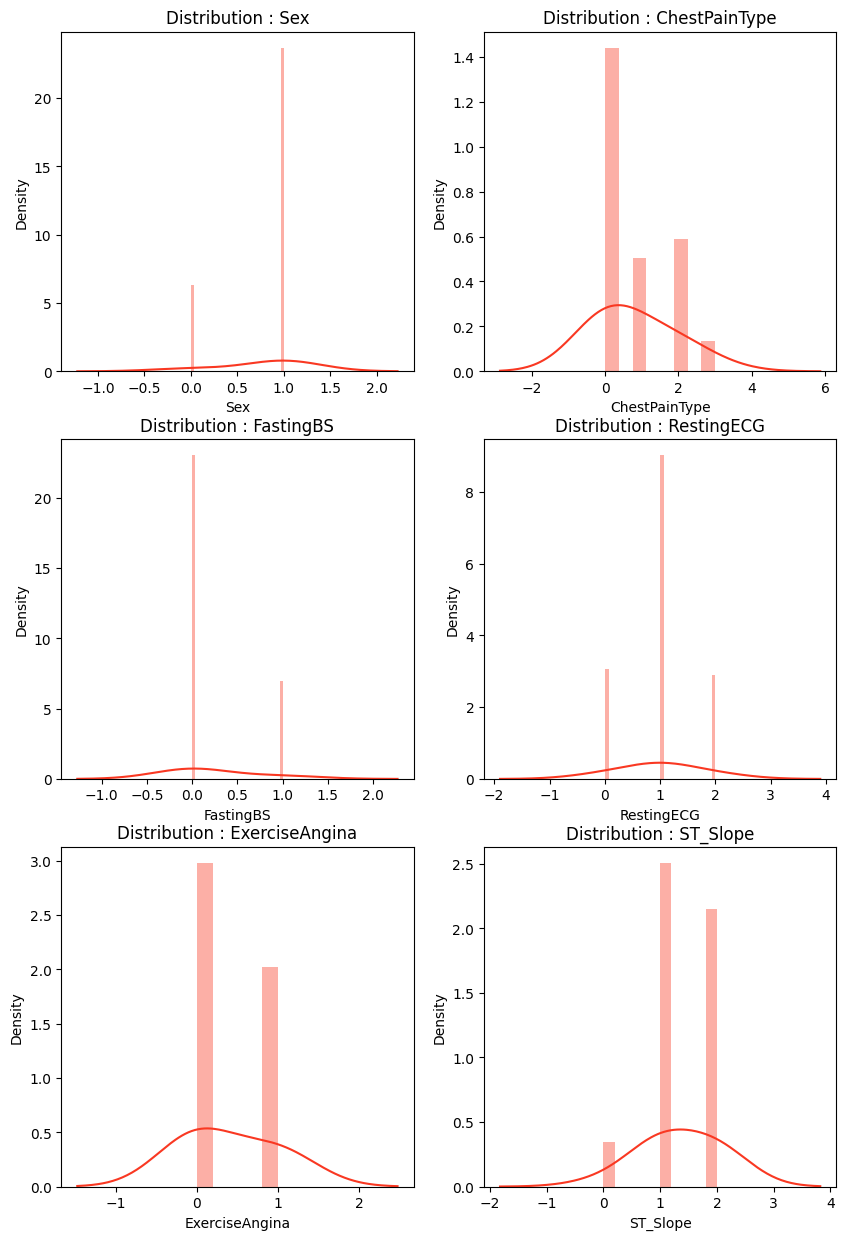

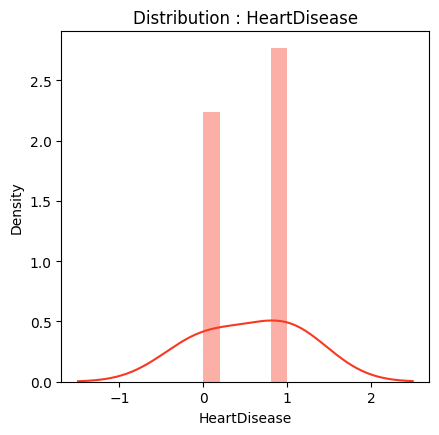

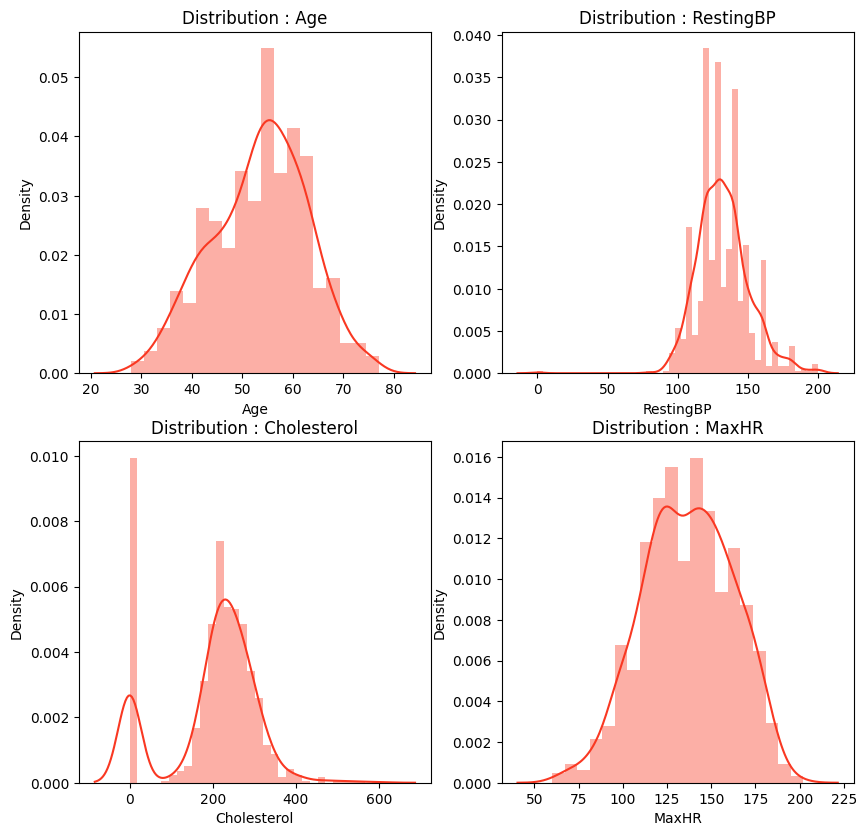

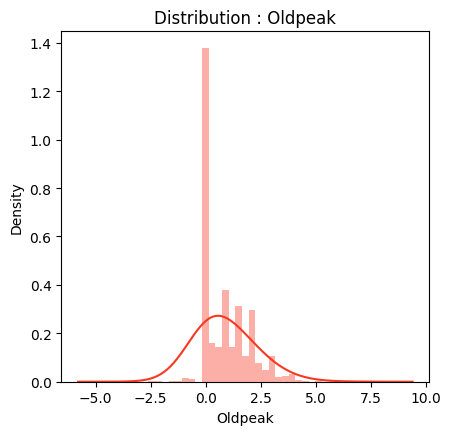

In [17]:
col = list(df.columns)
colors = ['#F93822','#FDD20E']
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = df.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(categorical_features) - 1):
    
    plt.subplot(3,2,i+1)
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)
    
plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[categorical_features[len(categorical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + categorical_features[len(categorical_features) - 1]
plt.title(title);

fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (10,9.75))
for i in range(len(numerical_features) - 1):
    plt.subplot(2,2,i+1)
    sns.distplot(df[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + numerical_features[len(numerical_features) - 1]
plt.title(title);



TARGET VARIABLE

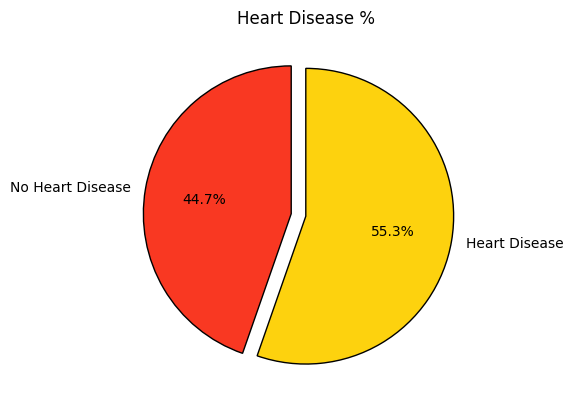

In [18]:
l = list(df['HeartDisease'].value_counts())
circle = [l[1] / sum(l) * 100,l[0] / sum(l) * 100]


plt.pie(circle,labels = ['No Heart Disease','Heart Disease'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Heart Disease %');



CATEGORICAL FEATURES VS POSITIVE-CASES

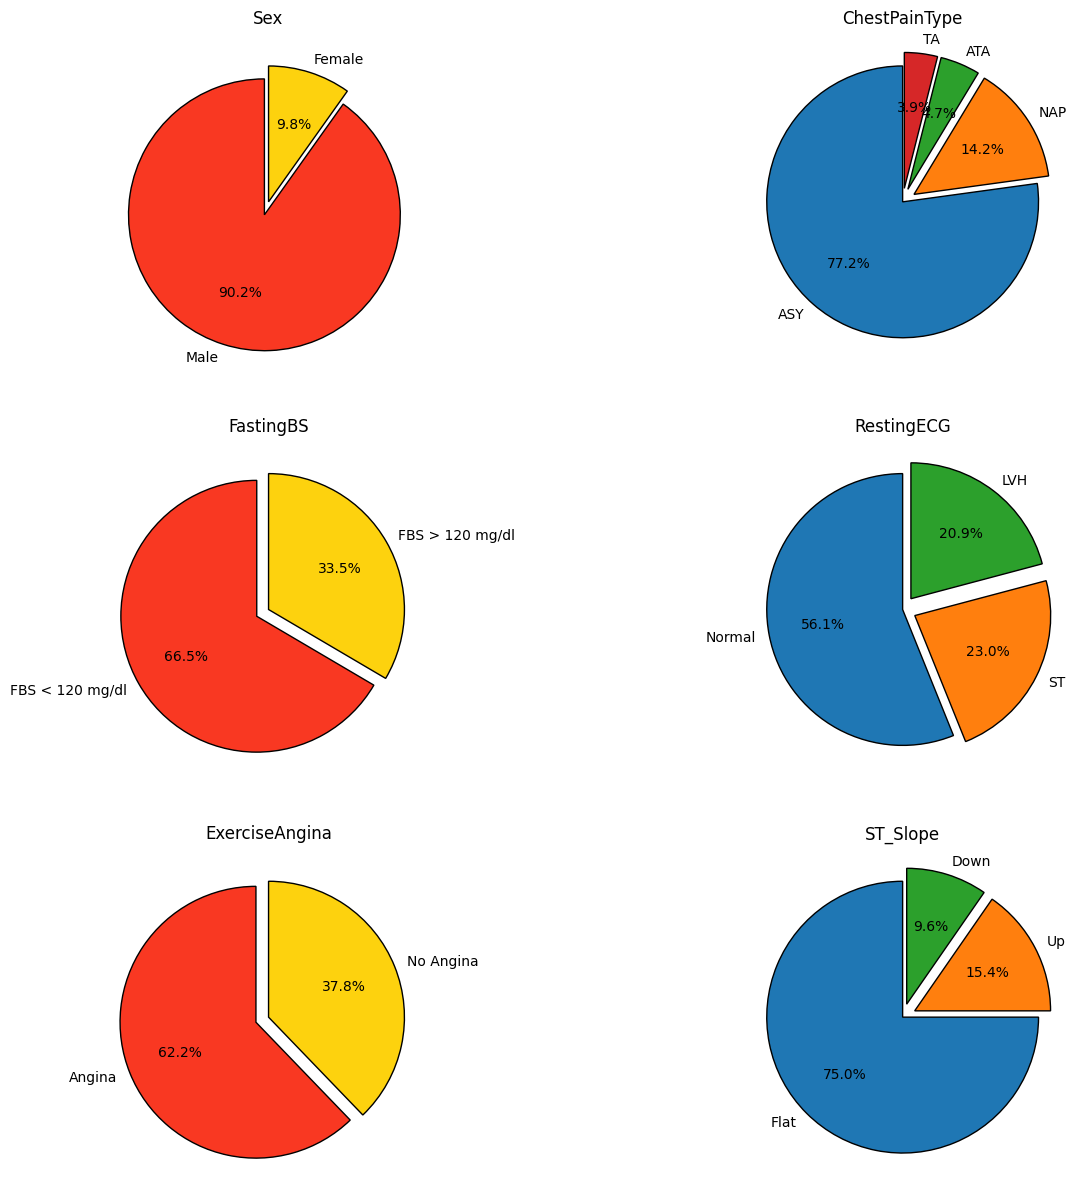

In [19]:
sex = df[df['HeartDisease'] == 1]['Sex'].value_counts()
sex = [sex[0] / sum(sex) * 100, sex[1] / sum(sex) * 100]

cp = df[df['HeartDisease'] == 1]['ChestPainType'].value_counts()
cp = [cp[0] / sum(cp) * 100,cp[1] / sum(cp) * 100,cp[2] / sum(cp) * 100,cp[3] / sum(cp) * 100]

fbs = df[df['HeartDisease'] == 1]['FastingBS'].value_counts()
fbs = [fbs[0] / sum(fbs) * 100,fbs[1] / sum(fbs) * 100]

restecg = df[df['HeartDisease'] == 1]['RestingECG'].value_counts()
restecg = [restecg[0] / sum(restecg) * 100,restecg[1] / sum(restecg) * 100,restecg[2] / sum(restecg) * 100]

exang = df[df['HeartDisease'] == 1]['ExerciseAngina'].value_counts()
exang = [exang[0] / sum(exang) * 100,exang[1] / sum(exang) * 100]

slope = df[df['HeartDisease'] == 1]['ST_Slope'].value_counts()
slope = [slope[0] / sum(slope) * 100,slope[1] / sum(slope) * 100,slope[2] / sum(slope) * 100]

ax,fig = plt.subplots(nrows = 4,ncols = 2,figsize = (15,15))

plt.subplot(3,2,1)
plt.pie(sex,labels = ['Male','Female'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Sex');

plt.subplot(3,2,2)
plt.pie(cp,labels = ['ASY', 'NAP', 'ATA', 'TA'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ChestPainType');

plt.subplot(3,2,3)
plt.pie(fbs,labels = ['FBS < 120 mg/dl','FBS > 120 mg/dl'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('FastingBS');

plt.subplot(3,2,4)
plt.pie(restecg,labels = ['Normal','ST','LVH'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('RestingECG');

plt.subplot(3,2,5)
plt.pie(exang,labels = ['Angina','No Angina'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ExerciseAngina');

plt.subplot(3,2,6)
plt.pie(slope,labels = ['Flat','Up','Down'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ST_Slope');